In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import seaborn as sns
sns.set_theme()

In [2]:
def distinct_colors():
    colors = [[230, 25, 75], [60, 180, 75], [0, 130, 200], [245, 130, 48], [145, 30, 180],  [250, 190, 212], [0, 128, 128], [220, 190, 255], [170, 110, 40], [255, 250, 200], [128, 0, 0], [170, 255, 195], [128, 128, 0], [255, 215, 180], [0, 0, 128], [128, 128, 128], [255, 255, 255], [0, 0, 0]]
    colors = [[c[0]/255,c[1]/255,c[2]/255] for c in colors]
    return colors

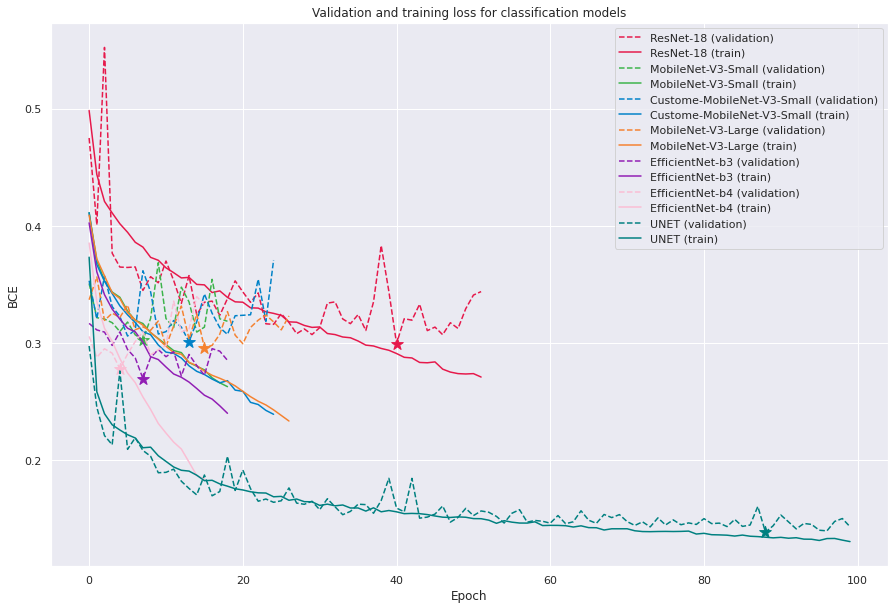

In [16]:
metrics_path = "/space/dryngler/dry_rot/experiments"
experiment_numbers = {11:'ResNet-18',12:"MobileNet-V3-Small",13:"Custome-MobileNet-V3-Small",14:"MobileNet-V3-Large",15:"EfficientNet-b3",16:"EfficientNet-b4",22:"UNET"}

colors = distinct_colors()

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

iterator = -1
for i in experiment_numbers:
    iterator+=1
    file=os.path.join(metrics_path,str(i),"metrics","metrics.json")
    with open(file,'r') as f:
        metrics = json.load(f)
        ax.plot(list(range(len(metrics['val_losses']))),metrics['val_losses'],label=f"{experiment_numbers[i]} (validation)", color=colors[iterator], linestyle='dashed')
        ax.plot(list(range(len(metrics['train_losses']))),metrics['train_losses'],label=f"{experiment_numbers[i]} (train)", color=colors[iterator])
        ax.scatter(metrics['best_epoch'],metrics['val_losses'][int(metrics['best_epoch'])], color=colors[iterator], marker='*',s=150)
        
ax.set_title('Validation and training loss for classification models')
ax.set_xlabel('Epoch')
ax.set_ylabel('BCE')
ax.legend()
plt.savefig("classification_loss.jpg",dpi=600)
plt.show()

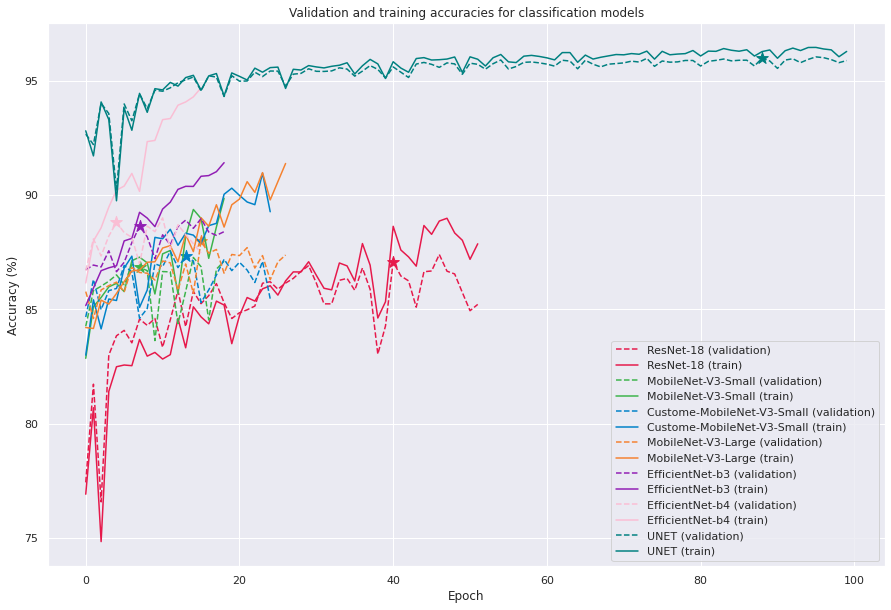

In [18]:

metrics_path = "/space/dryngler/dry_rot/experiments"
experiment_numbers = {11:'ResNet-18',12:"MobileNet-V3-Small",13:"Custome-MobileNet-V3-Small",14:"MobileNet-V3-Large",15:"EfficientNet-b3",16:"EfficientNet-b4",22:"UNET"}

colors = distinct_colors()

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

iterator = -1
for i in experiment_numbers:
    iterator+=1
    file=os.path.join(metrics_path,str(i),"metrics","metrics.json")
    
    with open(file,'r') as f:
        metrics = json.load(f)
        ax.plot(list(range(len(metrics['val_accuracies']))),metrics['val_accuracies'],label=f"{experiment_numbers[i]} (validation)", color=colors[iterator], linestyle='dashed')
        ax.plot(list(range(len(metrics['train_accuracies']))),metrics['train_accuracies'],label=f"{experiment_numbers[i]} (train)", color=colors[iterator])
        ax.scatter(metrics['best_epoch'],metrics['val_accuracies'][int(metrics['best_epoch'])], color=colors[iterator], marker='*',s=150)

ax.set_title('Validation and training accuracies for classification models')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.legend()
plt.savefig("classification_accuracy.jpg",dpi=600)
plt.show()

KeyError: 'best_epoch'

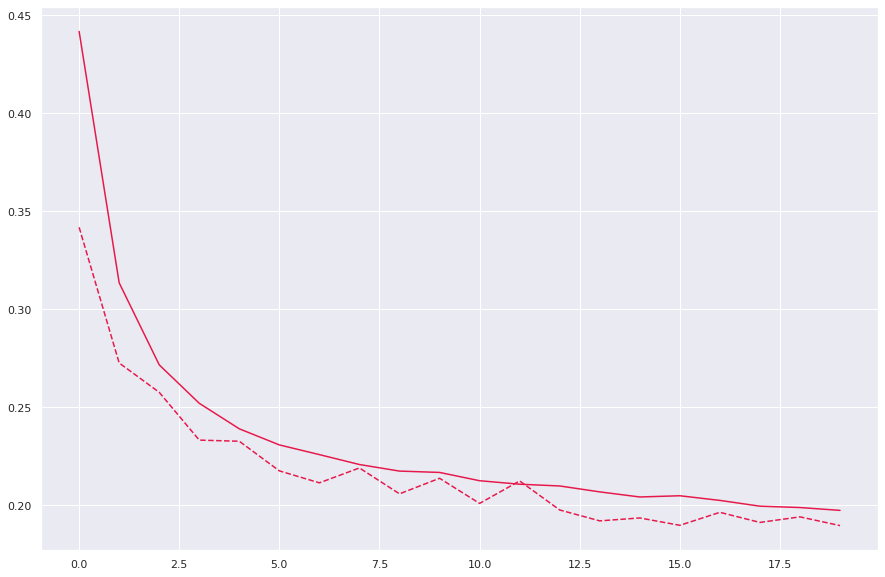

In [35]:
colors = distinct_colors()

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
folders = os.listdir("segmentation")
metrics = {}
for i,folder in enumerate(folders):
    file=f"segmentation/{folder}/metrics.json"
    with open(file,'r') as f:
        metrics[folder] = json.load(f)
        ax.plot(list(range(len(metrics[folder]['val_losses']))),metrics[folder]['val_losses'],label=f"{folder} (validation)", color=colors[i], linestyle='dashed')
        ax.plot(list(range(len(metrics[folder]['train_losses']))),metrics[folder]['train_losses'],label=f"{folder} (train)", color=colors[i])
        ax.scatter(metrics[folder]['best_epoch'],metrics[folder]['val_losses'][int(metrics[folder]['best_epoch'])], color=colors[i], marker='*',s=150)

ax.set_title('Validation and training loss for segmentation model')
ax.set_xlabel('Epoch')
ax.set_ylabel('Dice')
ax.legend()
plt.savefig("segmentation_loss.jpg",dpi=300)
plt.show()

KeyError: 'best_epoch'

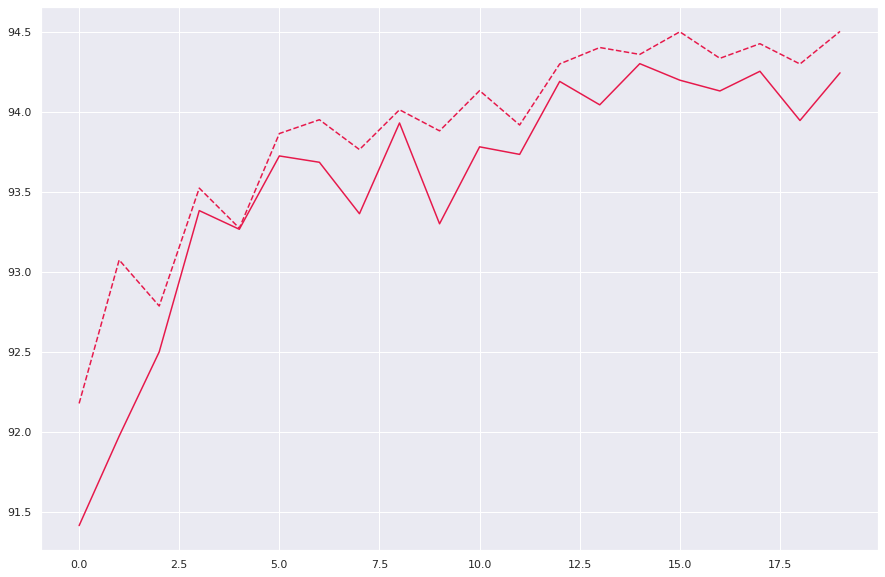

In [33]:
colors = distinct_colors()

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
folders = os.listdir("segmentation")
metrics = {}
for i,folder in enumerate(folders):
    file=f"segmentation/{folder}/metrics.json"
    with open(file,'r') as f:
        metrics[folder] = json.load(f)
        ax.plot(list(range(len(metrics[folder]['val_accuracies']))),metrics[folder]['val_accuracies'],label=f"{folder} (validation)", color=colors[i], linestyle='dashed')
        ax.plot(list(range(len(metrics[folder]['train_accuracies']))),metrics[folder]['train_accuracies'],label=f"{folder} (train)", color=colors[i])
        ax.scatter(metrics[folder]['best_epoch'],metrics[folder]['val_accuracies'][int(metrics[folder]['best_epoch'])], color=colors[i], marker='*',s=150)

ax.set_title('Validation and training accuracies for segmentation models')
ax.set_xlabel('Epoch')
ax.set_ylabel('IoU')
ax.legend()
plt.savefig("segmentation_accuracy.jpg")
plt.show()

In [43]:
for i,folder in enumerate(os.listdir("classification")):
    file=f"classification/{folder}/metrics.json"
    with open(file,'r') as f:
        metrics[folder] = json.load(f)
        print("{0}: {1:.2f}\t{2:.2f}\t{3:.2f}\t{4:.2f}".format(folder,\
            metrics[folder]['train_losses'][int(metrics[folder]['best_epoch'])],\
            metrics[folder]['val_losses'][int(metrics[folder]['best_epoch'])],\
            metrics[folder]['train_accuracies'][int(metrics[folder]['best_epoch'])],\
            metrics[folder]['val_accuracies'][int(metrics[folder]['best_epoch'])]))

efficient_net_b3: 0.29	0.31	89.87	87.82
efficient_net_b4: 0.29	0.32	90.55	87.53
resnet_18: 0.33	0.34	86.13	86.10
mobilenet_v3_large: 0.33	0.33	86.48	86.31
mobilenet_v3_small: 0.35	0.34	86.27	86.37
custom_mobilenet_v3_small: 0.29	0.33	88.75	85.99
